In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [18]:
# Importing DATA SET:

data = pd.read_csv('car data.csv')
print('The Dataset is as: \n')
print(data.info())
print('\nTop 5 entry in data set: \n')
print(data.head())
print('\nTop 3 entry in data set: \n')
print(data.head(3))
print('\nNo. of rows and columns: \n')
print(data.shape)                                   # We use .shape and NOT .shape() because data.shape is tuple not a function
print('\nTo find the missing values we use this function: ')
data.isnull().sum()

The Dataset is as: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Top 5 entry in data set: 

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wago

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
# CHECKING THE DISTRIBUTION OF CATEGORICAL DATA IN COLUMN:

# This is used to check different types of category in particular column, by using  .value_counts()

print(data.Seller_Type.value_counts(), '\n')
print(data.Fuel_Type.value_counts(), '\n')
print(data.Transmission.value_counts(), '\n')

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



In [4]:
# ENCODING THE CATAGORICAL DATA:

# Models have problem dealing with text data so we convert text data into integer type so it can be deal with model

# Encoding the Fuel_Type data
data.replace({'Fuel_Type': {'Petrol':0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding the Seller_Type data
data.replace({'Seller_Type': {'Dealer':0, 'Individual': 1}}, inplace=True)

# Encoding the Transmission data
data.replace({'Transmission': {'Manual':0, 'Automatic': 1}}, inplace=True)

#Printing the first 5 data to check if encoding happened or not
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


In [5]:
# DEFINING i/p AND o/p OF DATASET:

# Input 
x = data.drop(['Car_Name', 'Selling_Price', 'Owner'], axis=1)
# Output
y = data['Selling_Price']

print('Input features are:\n', x)
print('Output is:\n', y)

Input features are:
      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission
0    2014           5.59       27000          0            0             0
1    2013           9.54       43000          1            0             0
2    2017           9.85        6900          0            0             0
3    2011           4.15        5200          0            0             0
4    2014           6.87       42450          1            0             0
..    ...            ...         ...        ...          ...           ...
296  2016          11.60       33988          1            0             0
297  2015           5.90       60000          0            0             0
298  2009          11.00       87934          0            0             0
299  2017          12.50        9000          1            0             0
300  2016           5.90        5464          0            0             0

[301 rows x 6 columns]
Output is:
 0       3.35
1       4.75
2       7.25
3   

In [6]:
# SPLITTING THE DATASET IN TRAINING AND TESTING:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=2)
# Here test_size=0.1 means that test data is 10% of total data
# And random_state is used to set a seed for random number generation, ensuring that the split is reproducible.
# Using a fixed random_state value means that the data will always be split in the same way, allowing consistent results
# across different runs.

In [7]:
# CREATING LINEAR REGRESSION MODEL:

# This initializes an instance of the LinearRegression model from scikit-learn.
# The LinearRegression() class implements the ordinary least squares method, which finds the line (or hyperplane in 
# higher dimensions) that best fits the data.
# lin_model is now a linear regression model object that can be trained using the training data.
lin_model = LinearRegression()

# The fit() method computes the best-fitting linear relationship between X_train and Y_train by learning the model's 
# coefficients (slope and intercept).
lin_model.fit(X_train, Y_train)

LinearRegression()

In [8]:
# PREDICTING THE TEST VALUES AND THEN COMPARING WITH THE ORIGINAL DATA VALUE(Y_test)

Y_pred = lin_model.predict(X_test)
# The predict() method uses the trained model (which has already learned the relationship between the features and the target 
# variable) to predict the target values for the given input data.

# Printing original output values(Y_test) and predicted output values
print('Predicted values are:\n', Y_pred)
print('\nReal values are:\n', Y_test)
# In real values the right column is telling the output data


Predicted values are:
 [10.26768234  0.70882202  4.25549078  4.77808552  9.84505253  4.23999194
  6.91700412  7.30834045  0.14683253  5.1849117   6.23351899  6.08520808
  2.08156915  7.76422902  1.86308339  1.75484073  2.06902894  1.88916219
  9.25448213  4.25603622  1.50428682  9.04293808  1.48464832  9.62479892
  0.8336489   8.00332354  1.55771164 -2.43984811  4.26342611  2.09040833
  3.43843883]

Real values are:
 99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [9]:
# MODEL EVALUATION:

error = metrics.r2_score(Y_test, Y_pred)
print('R squared error for linear model: ', error)

MAE = metrics.mean_absolute_error(Y_test, Y_pred)
print('\nMean Absolute Error for linear model: ', MAE)

R squared error for linear model:  0.8498617573093811

Mean Absolute Error for linear model:  1.1177822544855511


In [10]:
# 2nd MODEL USING LASSO REGRESSION:

las_model = Lasso()

# .fit() function is used to train a machine learning model in most machine learning libraries, including scikit-learn.
# The fit() function learns the relationships between the features (input data) and the target (output) by adjusting the 
# model’s internal parameters.
las_model.fit(X_train, Y_train)

Lasso()

In [11]:
# PREDICTING VALUES THROUGH LASSO REGRESSION:

Y_pred2 = las_model.predict(X_test)
print('Predicted values by Lasso:\n',Y_pred2)
print('Original values:\n', Y_test)

Predicted values by Lasso:
 [ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]
Original values:
 99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [12]:
# LASSO MODEL EVALUTION:

error = metrics.r2_score(Y_test, Y_pred2)
print('R squared error is for lasso model: ', error)

MAE = metrics.mean_absolute_error(Y_test, Y_pred2)
print('\nMean Absolute Error for lasso model: ', MAE)

R squared error is for lasso model:  0.8709167941173195

Mean Absolute Error for lasso model:  1.0507413774170433


In [13]:
# DECISION TREE REGRESSOR MODEL:

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [14]:
# PREDICTING VALUES THROUGH DECISION TREE REGRESSOR:

Y_pred3 = tree_model.predict(X_test)
print('Predicted values:\n', Y_pred3)
print('Actual values:\n', Y_test)

Predicted values:
 [ 9.25  0.75  4.    3.1   9.7   5.3   2.65  7.45  0.25  5.8   7.5   4.6
  0.25  8.65  2.95  0.9   0.65  0.48 11.75  4.15  1.35 11.75  0.48  9.15
  0.48  6.85  0.6   0.12  3.1   3.    0.48]
Actual values:
 99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [15]:
# DECISION TREE MODEL EVALUATOIN:

error = metrics.r2_score(Y_test, Y_pred3)
MAE = metrics.mean_absolute_error(Y_test, Y_pred3)

print('R squared error for Decision Tree is: ', error)
print('\nMean absolute error for Decision Tree is: ', MAE)

R squared error for Decision Tree is:  0.9446100720012577

Mean absolute error for Decision Tree is:  0.4761290322580646


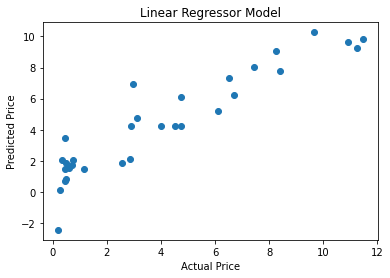

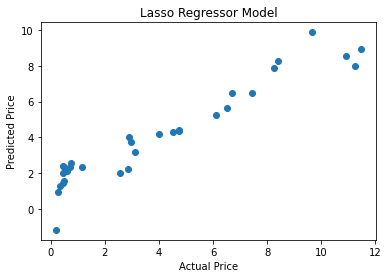

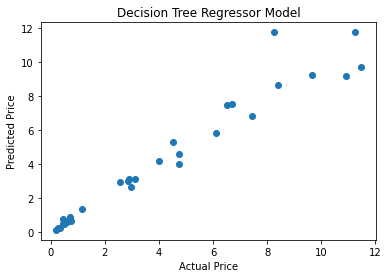

In [16]:
# MODEL PERFORMANCE VISUALISATION OF THE MODELS:

plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regressor Model')
plt.show()

plt.scatter(Y_test, Y_pred2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regressor Model')
plt.show()

plt.scatter(Y_test, Y_pred3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regressor Model')
plt.show()

In [17]:
# PREDICTING CAR PRICE FOR NEW DATAPOINT:

# New car data (7 features, same order as the training data)
new_car_data = np.array([[2015, 7.5, 25000, 0, 1, 0]])

# Predicting the selling price using the trained model
predicted_price = tree_model.predict(new_car_data)

print(f"Predicted selling price for the new car is: {predicted_price[0]}")

Predicted selling price for the new car is: 5.8


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
